Iteration 1/100, Best Length: 25.05909680029271
Iteration 2/100, Best Length: 24.12257742277737
Iteration 3/100, Best Length: 22.812719127946167
Iteration 4/100, Best Length: 22.812719127946167
Iteration 5/100, Best Length: 22.812719127946167
Iteration 6/100, Best Length: 22.812719127946167
Iteration 7/100, Best Length: 22.812719127946167
Iteration 8/100, Best Length: 22.812719127946167
Iteration 9/100, Best Length: 22.812719127946167
Iteration 10/100, Best Length: 22.812719127946167
Iteration 11/100, Best Length: 22.812719127946167
Iteration 12/100, Best Length: 22.812719127946167
Iteration 13/100, Best Length: 22.812719127946167
Iteration 14/100, Best Length: 22.812719127946167
Iteration 15/100, Best Length: 22.812719127946167
Iteration 16/100, Best Length: 22.812719127946167
Iteration 17/100, Best Length: 22.812719127946167
Iteration 18/100, Best Length: 22.812719127946167
Iteration 19/100, Best Length: 22.812719127946167
Iteration 20/100, Best Length: 22.812719127946167
Iteration 2

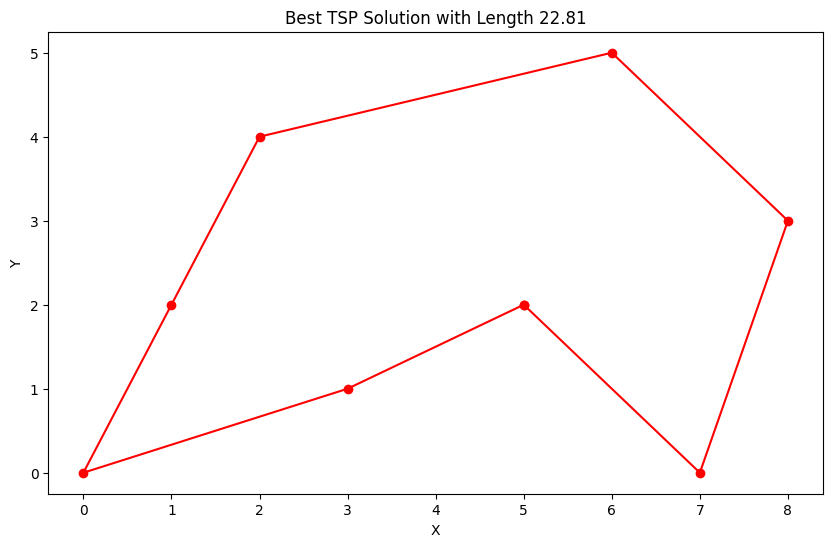

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

class AntColonyTSP:
    def __init__(self, cities, num_ants=50, num_iterations=100, alpha=1.0, beta=2.0, rho=0.1, Q=100):
        self.cities = cities  # List of city coordinates
        self.num_cities = len(cities)  # Number of cities
        self.num_ants = num_ants  # Number of ants
        self.num_iterations = num_iterations  # Number of iterations
        self.alpha = alpha  # Influence of pheromone
        self.beta = beta  # Influence of distance (heuristic)
        self.rho = rho  # Pheromone evaporation rate
        self.Q = Q  # Constant for pheromone update

        # Initialize pheromone levels: start with a small positive value for all city pairs
        self.pheromone = np.ones((self.num_cities, self.num_cities)) * 0.1

        # Calculate distance matrix
        self.dist_matrix = np.zeros((self.num_cities, self.num_cities))
        for i in range(self.num_cities):
            for j in range(i + 1, self.num_cities):
                distance = self.euclidean_distance(self.cities[i], self.cities[j])
                self.dist_matrix[i][j] = distance
                self.dist_matrix[j][i] = distance

    def euclidean_distance(self, city1, city2):
        return math.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

    def probability(self, current_city, next_city, visited_cities):
        pheromone = self.pheromone[current_city][next_city] ** self.alpha
        distance = self.dist_matrix[current_city][next_city] ** self.beta
        if next_city in visited_cities:
            return 0
        return pheromone / distance

    def construct_solution(self):
        visited_cities = [random.randint(0, self.num_cities - 1)]  # Random starting city
        tour = visited_cities[:]

        while len(visited_cities) < self.num_cities:
            current_city = visited_cities[-1]
            probabilities = []
            total_prob = 0.0
            for next_city in range(self.num_cities):
                prob = self.probability(current_city, next_city, visited_cities)
                probabilities.append(prob)
                total_prob += prob

            if total_prob == 0:  # If no valid moves, choose randomly
                next_city = random.choice([i for i in range(self.num_cities) if i not in visited_cities])
            else:
                normalized_probs = [p / total_prob for p in probabilities]
                next_city = np.random.choice(self.num_cities, p=normalized_probs)

            visited_cities.append(next_city)
            tour.append(next_city)

        # Add the return to the start city
        tour.append(tour[0])
        return tour

    def calculate_tour_length(self, tour):
        length = 0
        for i in range(len(tour) - 1):
            length += self.dist_matrix[tour[i]][tour[i + 1]]
        return length

    def update_pheromones(self, all_solutions):
        # Evaporate pheromones
        self.pheromone *= (1 - self.rho)

        # Update pheromones for each solution
        for solution, length in all_solutions:
            for i in range(len(solution) - 1):
                self.pheromone[solution[i]][solution[i + 1]] += self.Q / length

    def run(self):
        best_tour = None
        best_length = float('inf')

        for iteration in range(self.num_iterations):
            all_solutions = []
            for _ in range(self.num_ants):
                tour = self.construct_solution()
                length = self.calculate_tour_length(tour)
                all_solutions.append((tour, length))

                if length < best_length:
                    best_length = length
                    best_tour = tour

            self.update_pheromones(all_solutions)
            print(f"Iteration {iteration + 1}/{self.num_iterations}, Best Length: {best_length}")

        return best_tour, best_length

    def plot_solution(self, best_tour):
        tour_cities = np.array(self.cities)[best_tour]
        plt.figure(figsize=(10, 6))
        plt.plot(tour_cities[:, 0], tour_cities[:, 1], 'ro-')
        plt.title(f'Best TSP Solution with Length {self.calculate_tour_length(best_tour):.2f}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()



# Define cities (x, y coordinates)
cities = [
    (0, 0), (1, 2), (2, 4), (3, 1),
    (5, 2), (6, 5), (7, 0), (8, 3)
]

# Initialize and run the Ant Colony Optimization algorithm
aco = AntColonyTSP(cities)
best_tour, best_length = aco.run()

print("Best Tour:", best_tour)
print("Best Length:", best_length)

# Plot the best solution found
aco.plot_solution(best_tour)
